In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
sales = pd.read_csv('sales.csv')
sales.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
sales

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [3]:
stock = pd.read_csv('sensor_stock_levels.csv')
stock.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
stock

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22
...,...,...,...,...
14995,b9bf6788-09f3-490b-959b-dc5b55edb4b6,2022-03-04 10:52:50,e37658de-3649-4ddb-9c73-b868dd69d3fe,0.66
14996,9ff1cc01-020f-491a-bafd-13552dccff44,2022-03-02 12:25:48,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.99
14997,4d8101de-e8a2-4af9-9764-7a3a22aa7084,2022-03-03 17:36:44,8e21dcec-d775-4969-8334-05a37a5fd189,0.72
14998,5f2a7b1e-b3c4-4395-8425-c960e22f701d,2022-03-02 19:42:47,9708cf5b-aa69-4320-a013-9d234c40e63f,0.95


In [4]:
temperature = pd.read_csv('sensor_storage_temperature.csv')
temperature.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
temperature

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38
...,...,...,...
23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:40:43,-1.46
23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:07:49,-19.37
23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:15:41,-2.89
23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:44:52,-2.56


### Converting 'timestamp' column to only Hours

In [5]:
sales['timestamp']=pd.to_datetime(sales['timestamp']).dt.strftime('%Y-%m-%d %H:00:00')
stock['timestamp']=pd.to_datetime(stock['timestamp']).dt.strftime('%Y-%m-%d %H:00:00')
temperature['timestamp']=pd.to_datetime(temperature['timestamp']).dt.strftime('%Y-%m-%d %H:00:00')

In [6]:
sales.head(3)


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet


In [7]:
stock.head(3)

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58


In [8]:
temperature.head(3)

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78


In [9]:
sales_agg =sales.groupby(['timestamp','product_id']).agg({'quantity':'sum'}).reset_index()
sales_agg

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11
...,...,...,...
6212,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3
6213,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3
6214,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,2
6215,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,1


In [10]:
stock_agg=stock.groupby(['timestamp','product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
stock_agg

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05
...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92


In [11]:
temperature_agg=temperature.groupby('timestamp').agg({'temperature':'mean'}).reset_index()
temperature_agg

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734
...,...,...
72,2022-03-07 15:00:00,-0.943848
73,2022-03-07 16:00:00,-0.230631
74,2022-03-07 17:00:00,-0.003988
75,2022-03-07 18:00:00,0.409693


- Stock table ['timestamp','product_id'], as base and left joining with sales table ['timestamp','product_id']

In [12]:
stock_sale=stock_agg.merge(sales_agg,on=['timestamp','product_id'],how='left')
stock_sale

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN
...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,NaN
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0


- Above created table ['timestamp'], as base left joining temperature table ['timestamp']

In [13]:
stock_sale_temp=stock_sale.merge(temperature_agg, on=['timestamp'],how='left')
stock_sale_temp

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.028850
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.028850
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.028850
...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,NaN,-0.165077
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077


- #### Now, we combined all tables. Lets merge some other features like 'category' and 'unitprice' from sales table
- #### Firstly, create seperate table made of 'product_id' and 'category'
    - Remove duplicates, so that we get unique values in each column
- #### similarly, create seperate table made of 'product_id' and 'unit_price'
    - Remove duplicates, so that we get unique values in each column
- #### Left join these two with (stock_sale_temp) table

In [14]:
sales

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:00:00,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:00:00,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:00,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:00:00,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [15]:
product_category =sales.loc[:,['product_id','category']].drop_duplicates()
product_category

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products


In [16]:
product_price=sales.loc[:,['product_id','unit_price']].drop_duplicates()
product_price

,product_id,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,4.49
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,14.99
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,13.49
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,14.19
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,16.99


In [17]:
x=product_category.merge(product_price,on='product_id')
x

,product_id,category,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,4.49
...,...,...,...
295,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,14.99
296,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products,13.49
297,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,14.19
298,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products,16.99


In [18]:
merged_df=stock_sale_temp.merge(x, on='product_id',how='left')
merged_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.028850,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.028850,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.028850,pets,8.19
...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077,fruit,4.99
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,NaN,-0.165077,meat,19.99
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077,packaged foods,6.99
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,meat,14.99


In [19]:
merged_df.fillna(0,inplace=True)

## Feature Engineering


In [20]:
merged_df['timestamp']=pd.to_datetime(merged_df['timestamp'])

In [21]:
merged_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.028850,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.028850,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.028850,pets,8.19
...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077,fruit,4.99
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,0.0,-0.165077,meat,19.99
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077,packaged foods,6.99
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,meat,14.99


In [22]:
merged_df.drop('product_id',axis=1,inplace=True)

In [23]:
merged_df['day_name']=merged_df['timestamp'].dt.day_name() ## Extracts name of day

In [24]:
merged_df['Hour']=merged_df['timestamp'].dt.hour ## Extracts hour

In [25]:
merged_df

,timestamp,estimated_stock_pct,quantity,temperature,category,unit_price,day_name,Hour
0,2022-03-01 09:00:00,0.89,3.0,-0.028850,kitchen,11.19,Tuesday,9
1,2022-03-01 09:00:00,0.14,3.0,-0.028850,vegetables,1.49,Tuesday,9
2,2022-03-01 09:00:00,0.67,0.0,-0.028850,baby products,14.19,Tuesday,9
3,2022-03-01 09:00:00,0.82,0.0,-0.028850,beverages,20.19,Tuesday,9
4,2022-03-01 09:00:00,0.05,0.0,-0.028850,pets,8.19,Tuesday,9
...,...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,0.50,4.0,-0.165077,fruit,4.99,Monday,19
10841,2022-03-07 19:00:00,0.26,0.0,-0.165077,meat,19.99,Monday,19
10842,2022-03-07 19:00:00,0.78,3.0,-0.165077,packaged foods,6.99,Monday,19
10843,2022-03-07 19:00:00,0.92,3.0,-0.165077,meat,14.99,Monday,19


In [26]:
merged_df['is_weekend']=np.where(merged_df['day_name'].isin(['Saturday','Sunday']),1,0) ## encoding Weekends as '1'

In [27]:
merged_df

,timestamp,estimated_stock_pct,quantity,temperature,category,unit_price,day_name,Hour,is_weekend
0,2022-03-01 09:00:00,0.89,3.0,-0.028850,kitchen,11.19,Tuesday,9,0
1,2022-03-01 09:00:00,0.14,3.0,-0.028850,vegetables,1.49,Tuesday,9,0
2,2022-03-01 09:00:00,0.67,0.0,-0.028850,baby products,14.19,Tuesday,9,0
3,2022-03-01 09:00:00,0.82,0.0,-0.028850,beverages,20.19,Tuesday,9,0
4,2022-03-01 09:00:00,0.05,0.0,-0.028850,pets,8.19,Tuesday,9,0
...,...,...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,0.50,4.0,-0.165077,fruit,4.99,Monday,19,0
10841,2022-03-07 19:00:00,0.26,0.0,-0.165077,meat,19.99,Monday,19,0
10842,2022-03-07 19:00:00,0.78,3.0,-0.165077,packaged foods,6.99,Monday,19,0
10843,2022-03-07 19:00:00,0.92,3.0,-0.165077,meat,14.99,Monday,19,0


In [28]:
## Maps day name

day_name_mapping={
    'Sunday':1,
    'Monday':2,
    "Tuesday":3,
    'Wednesday':4,
    'Thursday':5,
    'Friday':6,
    'Saturday':7
    
}

In [29]:
merged_df['day']=merged_df['day_name'].map(day_name_mapping)

In [30]:
merged_df


,timestamp,estimated_stock_pct,quantity,temperature,category,unit_price,day_name,Hour,is_weekend,day
0,2022-03-01 09:00:00,0.89,3.0,-0.028850,kitchen,11.19,Tuesday,9,0,3
1,2022-03-01 09:00:00,0.14,3.0,-0.028850,vegetables,1.49,Tuesday,9,0,3
2,2022-03-01 09:00:00,0.67,0.0,-0.028850,baby products,14.19,Tuesday,9,0,3
3,2022-03-01 09:00:00,0.82,0.0,-0.028850,beverages,20.19,Tuesday,9,0,3
4,2022-03-01 09:00:00,0.05,0.0,-0.028850,pets,8.19,Tuesday,9,0,3
...,...,...,...,...,...,...,...,...,...,...
10840,2022-03-07 19:00:00,0.50,4.0,-0.165077,fruit,4.99,Monday,19,0,2
10841,2022-03-07 19:00:00,0.26,0.0,-0.165077,meat,19.99,Monday,19,0,2
10842,2022-03-07 19:00:00,0.78,3.0,-0.165077,packaged foods,6.99,Monday,19,0,2
10843,2022-03-07 19:00:00,0.92,3.0,-0.165077,meat,14.99,Monday,19,0,2


In [31]:
merged_df.drop(labels=['timestamp','day_name'],axis=1,inplace=True) ## Dropping 'timestamp','day_name' 

In [32]:
merged_df

,estimated_stock_pct,quantity,temperature,category,unit_price,Hour,is_weekend,day
0,0.89,3.0,-0.028850,kitchen,11.19,9,0,3
1,0.14,3.0,-0.028850,vegetables,1.49,9,0,3
2,0.67,0.0,-0.028850,baby products,14.19,9,0,3
3,0.82,0.0,-0.028850,beverages,20.19,9,0,3
4,0.05,0.0,-0.028850,pets,8.19,9,0,3
...,...,...,...,...,...,...,...,...
10840,0.50,4.0,-0.165077,fruit,4.99,19,0,2
10841,0.26,0.0,-0.165077,meat,19.99,19,0,2
10842,0.78,3.0,-0.165077,packaged foods,6.99,19,0,2
10843,0.92,3.0,-0.165077,meat,14.99,19,0,2


In [33]:
model_df=pd.get_dummies(merged_df,columns=['category'],drop_first=True) ## Dummy encoding for category column 
model_df

,estimated_stock_pct,quantity,temperature,unit_price,Hour,is_weekend,day,category_baked goods,category_baking,category_beverages,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.028850,11.19,9,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.028850,1.49,9,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.028850,14.19,9,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.028850,20.19,9,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.028850,8.19,9,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,0.50,4.0,-0.165077,4.99,19,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10841,0.26,0.0,-0.165077,19.99,19,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10842,0.78,3.0,-0.165077,6.99,19,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10843,0.92,3.0,-0.165077,14.99,19,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0


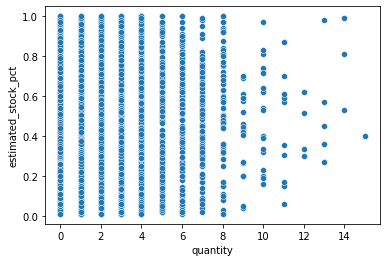

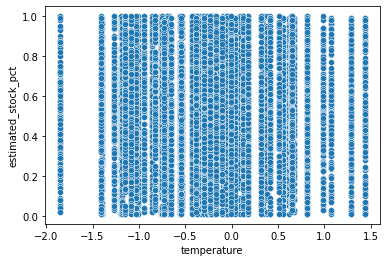

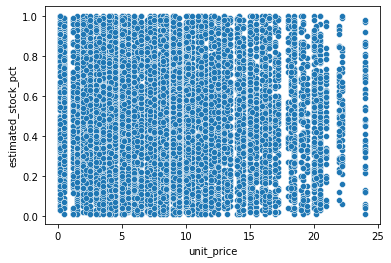

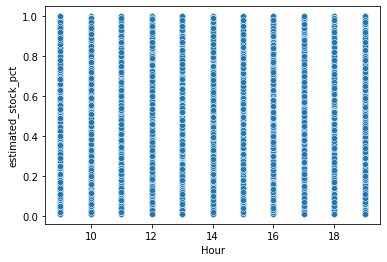

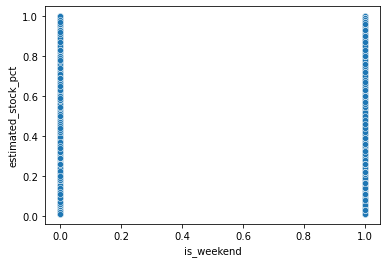

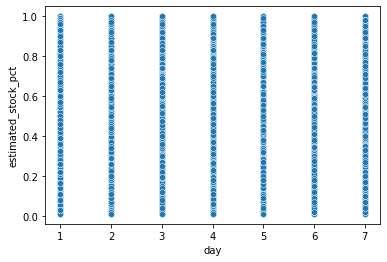

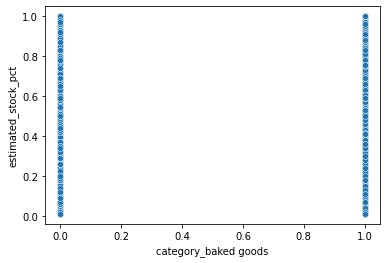

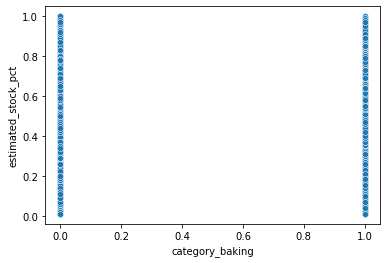

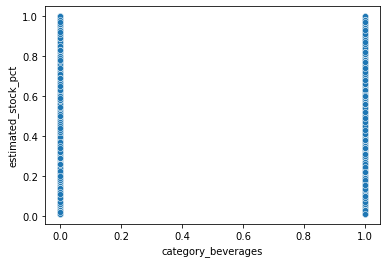

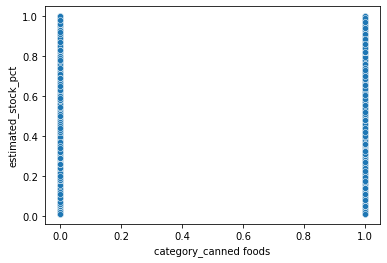

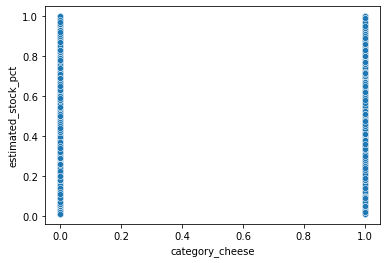

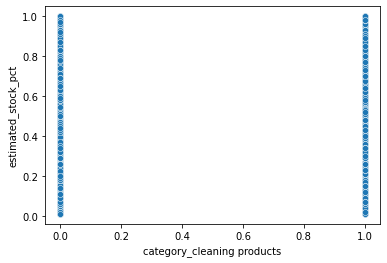

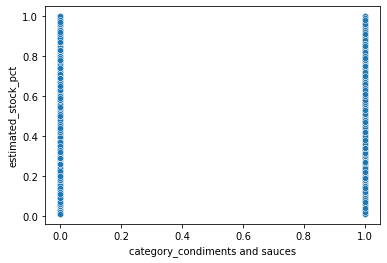

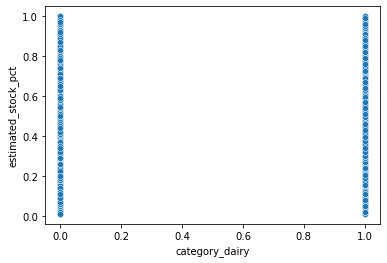

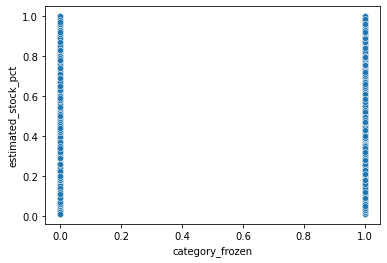

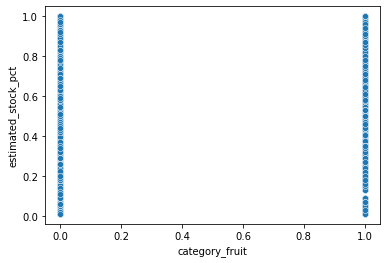

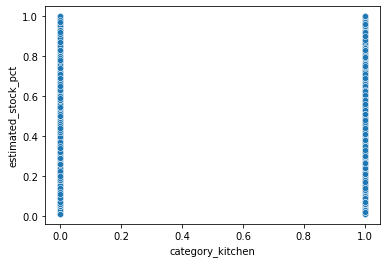

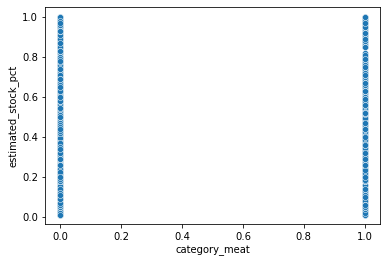

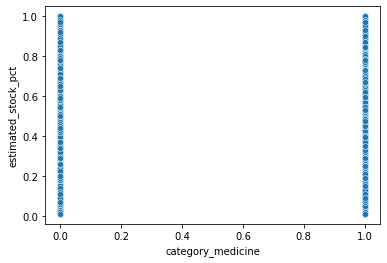

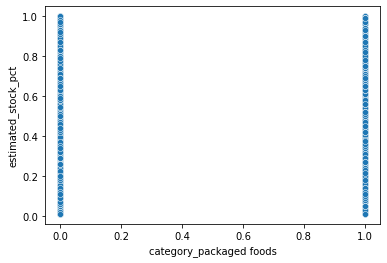

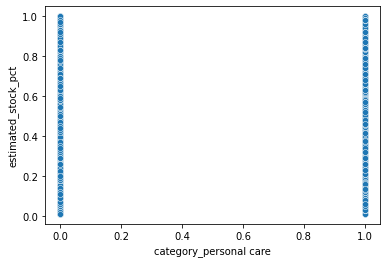

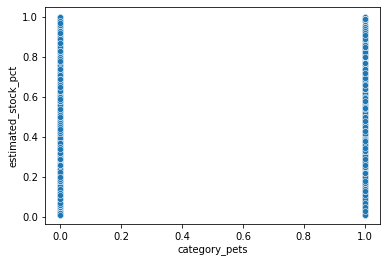

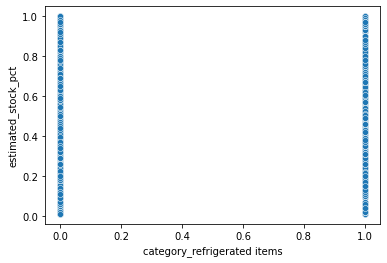

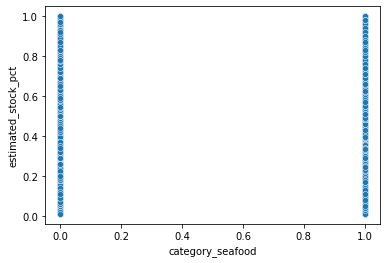

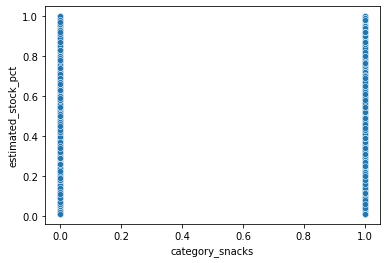

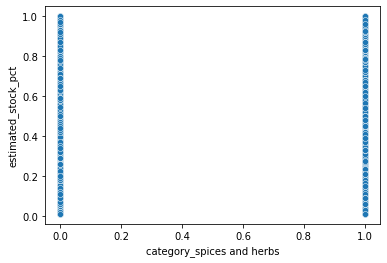

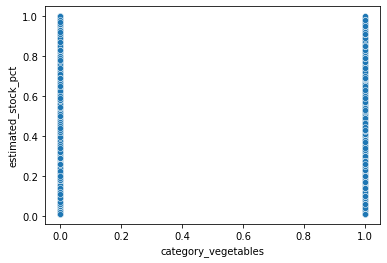

In [34]:
## Scatter plot of Independent variable vs Dependent variable

for i in model_df.drop('estimated_stock_pct',axis=1).columns:
    sns.scatterplot(x=model_df[i],y=model_df['estimated_stock_pct'])
    plt.show()

### Predictive Model

Here, I'm using Stochastic Gradient Descent Regressor (SGDRegressor) for the prediction

In [35]:
x=model_df.drop('estimated_stock_pct',axis=1).values
y=model_df['estimated_stock_pct'].values

In [36]:
x.shape, y.shape

((10845, 27), (10845,))

In [37]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=0)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7591, 27) (7591,)
(3254, 27) (3254,)


In [39]:
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.fit_transform(X_test)

In [40]:
model=SGDRegressor()

In [41]:
model.fit(X_train_scale,y_train)

SGDRegressor()

In [42]:
y_predict=model.predict(X_test_scale)

In [43]:
mean_absolute_error(y_test,y_predict)

0.22349647100534553

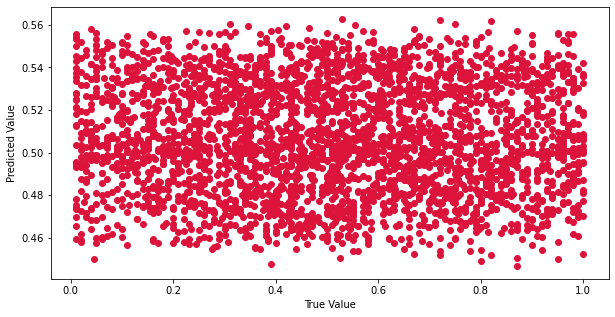

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_predict,c='crimson')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()